# Fundamentals

This document provides information on the fundamentals of the ampscan. 

The most fundamental component of ampscan is the AmpObject. This is used to read and store data about the mesh, as well as providing built in smoothing and visualisation methods. 

## Importing the shape

There are a two main ways to create the AmpObject. The main way is to pass in the filepath of a binary .stl file 

In [1]:
from ampscan import AmpObject
%matplotlib inline

In [2]:
amp = AmpObject('stl_file.stl')

The AmpObject has several standard attributes to the object:
- vert: the vertices of the AmpObject, an Nx3 numpy array with the cartesian position of each vertrx stored 
- faces: the connectivity of the mesh, detailing how the vertices are connected. For .stl files, 3 sided faces are always used, but ampscan can also process 4-sided faces. 
- values: The scalar value attached to each vertex, in the case of ampscan, this is often the displacement between vertices

These can be accessed using amp.attr. For example, the first vertex of the mesh can be accessed with:

In [3]:
amp.vert[0, :]

array([-54.448254,   5.750361, -69.07861 ], dtype=float32)

Additional attributes beyond the three above are also calculated but these rarely need to be exposed, more detail can be found in the code documentation.

Alternatively, the AmpObject can be created by passing a dictionary structure, ensuring the correct use of the attribute names

In [4]:
data = {
    'vert': amp.vert,
    'faces': amp.faces,
    'values': amp.values
}

amp2 = AmpObject(data)

amp2.vert[0, :]

array([-54.448254,   5.750361, -69.07861 ], dtype=float32)

## Visualising the shape 

ampscan possesses a number of methods for visualising the shapes, either as a static image, or as a dynamic window. To render the shape as a static image,   

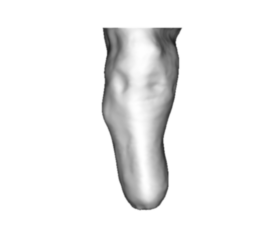

In [6]:
import matplotlib.pyplot as plt
plt.axis('off')
im = amp.genIm(out='im')[0]
ax = plt.imshow(im, interpolation='bicubic')

More detailed methods can be found in the main documentation regarding how to manipulate the visualisation. For example, through changing the view angle

Alternatively, you can use amp.display(). This will pop-up an interactive vtk render window which you can use to inspect the AmpObject.

NOTE: This currently not supported in jupyter notebook but will work otherwise

## Smoothing the shape

A laplacian smooth can also be applied to the shape. This works by replacing a vertex with the mean of its surrounding vertices, this smoothing method results in feature and volume loss so must be used with caution. The effect of smoothing can be seen below.

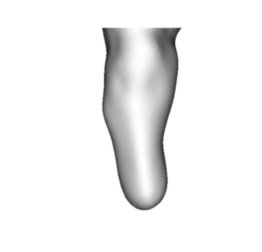

In [7]:
amp2.lp_smooth(n=10)
plt.axis('off')
im = amp2.genIm(out='im')[0]
ax = plt.imshow(im, interpolation='bicubic')

## Trimming the shape

We also have convienience methods for trimming the AmpObject, as shown below where we slice through the mid-patella: 

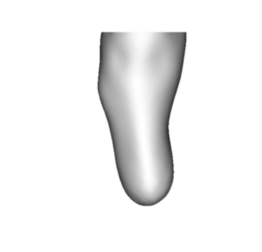

In [10]:
amp2.planarTrim(0, 2)
# Refresh the actor so the visualisation is up-to-date
amp2.addActor()
plt.axis('off')
im = amp2.genIm(out='im')[0]
ax = plt.imshow(im, interpolation='bicubic')

Now we have the fundamentals of ampscan, we can start to compare AmpObjects